This project is about the Aggregate supply (AS) and aggregate demand (AD) model of an open economy, where we look at both the possibility for a floating exchange rate economy and a fixed exchange rate economy. The project simulates and calibrates a model to best fit the real data for the danish economy. 

**Table of contents**<a id='toc0_'></a>    
- 1. [AS-AD for an open economy](#toc1_)    
- 2. [Analytical solution](#toc2_)    
- 3. [Numerical solution and calibration of model](#toc3_)    
- 4. [Further analysis (ideas)](#toc4_)    
- 5. [Conclusion](#toc5_)    


In [1]:
# Loading packages
%load_ext autoreload
%autoreload 2

from types import SimpleNamespace
import numpy as np
from scipy import optimize
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

from modelproject import ASADClass 

## 1. <a id='toc1_'></a>[AS-AD for an open economy](#toc0_)


In our model project, we model the the AS-AD model for an small, open economy with either a floating or a fixed exchange rate. The model demand side of the economy is given by the investment-saving curve (IS), the monetary policy rule (MP), the nominal exchange rate and the real exchange rate (ER), which together form the aggregate demand relationship (AD). The supply side is characterized by the aggregate supply curve (AS).


\begin{equation}
y - \bar{y} = \beta_1 (e_{t-1}^r + \Delta e_t + \pi^f - \pi_t) - \beta_2 (i - \pi^f - \bar{r}) + w_t \tag{IS}
\end{equation}

\begin{equation}
i_t = r^f + \pi^f + h(\pi_t - \pi^f) \tag{MP}
\end{equation}

\begin{equation}
\Delta e_t = -\frac{1}{\theta} (i - i^f) \tag{Nominal ER}
\end{equation}

$$ e^r_t = e^r_{t-1} + \Delta e_t-\pi_t+\pi^f \tag{Real ER}$$

$${\pi}_{t} = \pi^f + \gamma (y_t-\bar{y}_{t})+ s_t \tag{AS}$$



If we firstly define the output and inflation gaps

1. **Output gap:** $$\hat{y}_{t} = y_t-\bar{y}$$
2. **Inflation gap:** $$\hat{\pi}_{t} = \pi_t-\pi^{\ast}$$

## ASAD floating exchange rate
Then the ASAD open economy with a floating exchange rate can written as:

$$\hat{y}_{t} = \beta_1 e^r_{t-1}-\hat{\beta_1}\hat\pi_t + z_t \tag{AD - floating}$$

$$\hat{\pi}_{t} = \gamma \hat{y}_{t}+ s_t \tag{AS}$$

$$ e^r_t = e^r_{t-1} - \left(1+\frac{h}{\theta}\right)\hat\pi_t \tag{Real ER - floating}$$

where

$$   \hat\beta_1 = \beta_1 + h\left(\frac{\beta_1}{\theta}+\beta_2\right)>\beta_1$$
$$   z_t = w_t -\beta_2(r^f-\bar{r}^f)$$

## ASAD - Fixed exchange rate
The ASAD for the fixed exchange rate economy is a special case of the floating economy, but it has $h = 0$, that is, no monetary policy rule because MP is only used for keeping the exchange rate fixed. It also has $\Delta e_t = 0$, because the nominal exchange rate is fixed. Solving the model gives the following equations:

$$\hat{y}_{t} = \beta_1 (e^r_{t-1}-\hat{\pi}_{t}) + z_t \tag{AD - fixed}$$

$$\hat{\pi}_{t} = \gamma \hat{y}_{t}+ s_t \tag{AS}$$

$$ e^r_t = e^r_{t-1}-\hat\pi_t \tag{Real ER - fixed}$$

It can be seen that the two model equations become equal when h = 0.


## Further assumption
We assume that the demand and supply shocks are autoregressive on the form:
1. **Demand shock:** $$z_{t} = \delta z_{t-1}+x_{t}, x_{t} \sim N(0,\sigma_x^2)$$

2. **Supply shock:** $$s_{t} = \omega s_{t-1}+c_{t}, c_{t} \sim N(0,\sigma_c^2)$$

# Solving the model

### Floating exchange rate

The model can be rewritten by firstly inserting AS in AD and isolating for $e_{t-1}^r$:

$$
\hat{y}_t = \beta_1 e_{t-1}^r - \hat\beta_1 \gamma \hat{y}_t - \hat\beta_1 s_t + z_t \Leftrightarrow $$


$$
e_{t-1}^r = \frac{1+\hat\beta_1 \gamma}{\beta_1} \hat{y}_t + \frac{\hat\beta_1}{\beta_1} s_{t}-\frac{1}{\beta_1} z_t
$$

If we lag the real ER by one period we have:

$$
e_{t-1}^r = e_{t-2}^r - \left(1 + \frac{h}{\theta}\right) \hat{\pi}_{t-1}
$$

Inserting for $e^r_{t-1}$ which we found and collecting terms we have:

$$
\left(1 + \hat{\beta}_t \gamma\right) \hat{y}_t = \left(1 + \hat{\beta}_t \gamma\right) \hat{y}_{t-1} - \left(\hat{\beta}_1 s_t - \hat{\beta}_1 s_{t-1}\right) + \left(z_t - z_{t-1}\right) - \beta_1 \left(1 + \frac{h}{\theta}\right) \hat{\pi}_{t-1} \Leftrightarrow
$$

Inserting AS:

$$
\left(1 + \hat{\beta}_t \gamma\right) \hat{y}_t = \left(1 + \hat{\beta}_t \gamma\right) \hat{y}_{t-1} - \left(\hat{\beta}_1 s_t - \hat{\beta}_1 s_{t-1}\right) + \left(z_t - z_{t-1}\right) - \beta_1 \left(1 + \frac{h}{\theta}\right) \left(\gamma \hat{y}_{t-1} + s_{t-1}\right) \Leftrightarrow
$$

$$
\hat{y}_t = (1-ab\gamma) \hat{y}_{t-1} + a\left(z_t - z_{t-1}\right) - a\left(\hat{\beta}_1 s_t - s_{t-1} \left(\hat{\beta}_1 - b\right)\right) \quad \text{(*)}
$$

Repeating the same steps for the inflation gap gives:

$$
\hat{\pi}_t = (1-ab\gamma)\hat{\pi}_{t-1} + a\gamma(s_t - s_{t-1}) + a\gamma(z_t - z_{t-1}) \quad \text{(**)}
$$

where 

$$
a = \frac{1}{1+\hat\beta_1 \gamma}
$$
$$
b = \beta_1\left(1+\frac{h}{\theta}\right)
$$


### Fixed exchange rate
The model for the fixed exchange rate is a special case of the floating exchange rate economy, which is found by setting $h=0$ which  $\Rightarrow \hat\beta_1 = \beta_1$. The model for the fixed exchange can be written as:

$$
\hat{y}_t = \left(1-a\beta_1\gamma\right)\hat{y}_{t-1} + a(z_t - z_{t-1}) - a\beta_1 s_t \quad \text{(***)}
$$

$$
\hat{\pi}_t = \left(1-a\beta_1\gamma\right) \hat{\pi}_{t-1} + a (s_t - s_{t-1}) + a\gamma(z_t - z_{t-1}) \quad \text{(****)}
$$



In [2]:
model = ASADClass(floating = True)
par = model.par
sim = model.sim
print(f'{par.a = :.4f}')
print(f'{par.b = :.4f}')
print(f'{par.beta_1 = :.4f}')
print(f'{par.beta_hat = :.4f}')

par.a = 0.9213
par.b = 1.0889
par.beta_1 = 0.7000
par.beta_hat = 1.1389


## 2. <a id='toc2_'></a>[Calibration](#toc0_)

We want to calibrate our ASAD model so that it best fits real business cycle data. First, we simulate the model with 10.000 periods and plot the first 100 periods. For this simulation we calculate the moments such as standard deviation and the correlation between output and inflation gap.

In [3]:
model.simulate()

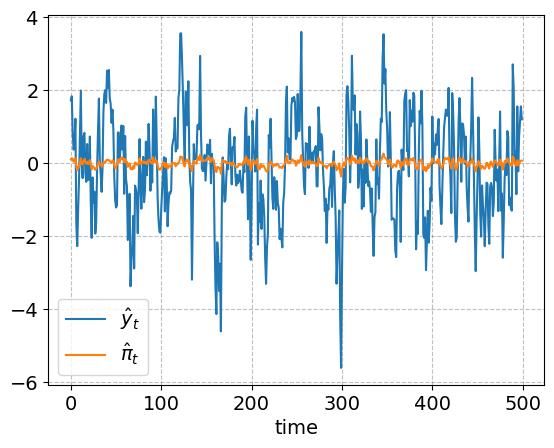

In [4]:
simT_fig = 500 # first 100 periods
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(simT_fig),sim.y_hat[:simT_fig],label='$\\hat{y}_t$')
ax.plot(np.arange(simT_fig),sim.pi_hat[:simT_fig],label='$\\hat{\pi}_t$')
ax.set_xlabel('time')
ax.legend(frameon=True);

We now want to compare the model moments with the real business cycle data for Denmark. In **business-cycle data** from the US we have:
* Note: Change data to Denmark for fixed economy
1. $std(\hat{y}_t) = 1.64$
2. $std({\hat{\pi}}_t) = 0.21$
3. $corr(\hat{y}_t,{\hat{\pi}}_t) = 0.31$
4. $corr(\hat{y}_t,\hat{y}_{t-1}) = 0.84$
5. $corr({\hat{\pi}}_t,{\hat{\pi}}_{t-1}) = 0.48$

We define the error as the sum of squared distances between model and the data.
$$
\begin{align*}
error(\delta,\omega,\sigma_x,\sigma_c) = &\,\,(std(\hat{y}_t^{data}) - std(\hat{y}_t^{model}))^2 \\
& + (std({\hat{\pi}}_t^{data}) - std({\hat{\pi}}_t^{model}))^2 \\
& + (corr(\hat{y}_t^{data},{\hat{\pi}}_t^{data}) - corr(\hat{y}_t^{data},{\hat{\pi}}_t^{model}))^2 \\
& + (corr(\hat{y}_t^{data},\hat{y}_{t-1}^{data}) - corr(\hat{y}_t^{model},\hat{y}_{t-1}^{model}))^2 \\
& + (corr({\hat{\pi}}_t^{data},{\hat{\pi}}_{t-1}^{data}) - corr({\hat{\pi}}_t^{model},{\hat{\pi}}_{t-1}^{model}))^2 \\
\end{align*}
$$

**The goal** is the change the autocorrelation and variance of the shocks so that the model best fits the Danish data. That is
$$
\min_{\delta,\omega,\sigma_x,\sigma_c} error(\delta,\omega,\sigma_x,\sigma_c)
$$

Below the objective function which simulates the model for given parameters and spits out the error has been defined

In [5]:
def obj(x,parnames,do_print=False):
    """ objective for choosing parameters """

    # a. update parameters
    for xval,parname in zip(x,parnames):
        par.__dict__[parname] = xval
        if do_print: print(f'{parname:10s} = {xval:.4f}')

    if do_print: print('')

    model.calc_compound_par()

    # b. simulate and calculate moments
    model.simulate()
    model.calc_moms()

    # c. compare with data
    error = model.calc_diff_to_data(do_print=do_print)

    return error

For the simulation with arbitrarly chosen parameters we have the followin error:

In [6]:
parnames = ['delta','omega','sigma_x','sigma_c']
x0 = [par.__dict__[parname] for parname in parnames]
error_ = obj(x0,parnames,do_print=True)

delta      = 0.8000
omega      = 0.1500
sigma_x    = 1.0000
sigma_c    = 0.2000

std_y       | data = 1.6400, model = 1.5091
std_pi      | data = 0.2100, model = 0.1042
corr_y_pi   | data = 0.3100, model = 0.8938
autocorr_y  | data = 0.8400, model = 0.7633
autocorr_pi | data = 0.4800, model = 0.7184
error =   0.43187207


We call the optimizer to minimize the error function where the AR coefficient is bound between 0 and 1 to remain stationary while the variance is bounded only by zero.

In [7]:
bounds = ((0,1-1e-8),(0,1-1e-8),(0,None),(0,None))
res = optimize.minimize(obj,x0,bounds=bounds,method='Nelder-Mead',args=(parnames,))
error_ = obj(res.x,parnames,do_print=True)

delta      = 0.7343
omega      = 0.0000
sigma_x    = 0.6471
sigma_c    = 0.5384

std_y       | data = 1.6400, model = 1.6461
std_pi      | data = 0.2100, model = 0.0723
corr_y_pi   | data = 0.3100, model = 0.3244
autocorr_y  | data = 0.8400, model = 0.8535
autocorr_pi | data = 0.4800, model = 0.4744
error =   0.01940972


Here we have calibrated the model which leads to a much smaller error and moments which are quite close to the business cycle data. The optimal parameters suggest that demand shocks are highly autocorrelated while supply shocks are less so. Demand is also more volatile than inflation. These results seem reasonable.

## 3. <a id='toc3_'></a>[Simulate](#toc0_)

We now simulate our calibrated model.


In [8]:
model.simulate()

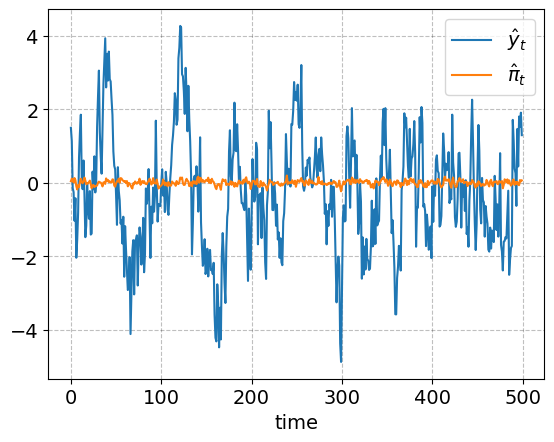

In [9]:
simT_fig = 500 # first 100 periods
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(simT_fig),sim.y_hat[:simT_fig],label='$\\hat{y}_t$')
ax.plot(np.arange(simT_fig),sim.pi_hat[:simT_fig],label='$\\hat{\pi}_t$')
ax.set_xlabel('time')
ax.legend(frameon=True);

The model seems quite well at simulating business cycles as we see periods of economic booms and busts. The business cycles in the calibrated model also seem more realistic compared to the firstly simulated model.

## 4. <a id='toc4_'></a>[Graphical analysis](#toc0_)

**Impulse response** to demand or supply shock. Errors are zero for all t.

Difference between y and y_hat for periods 1 to T. 

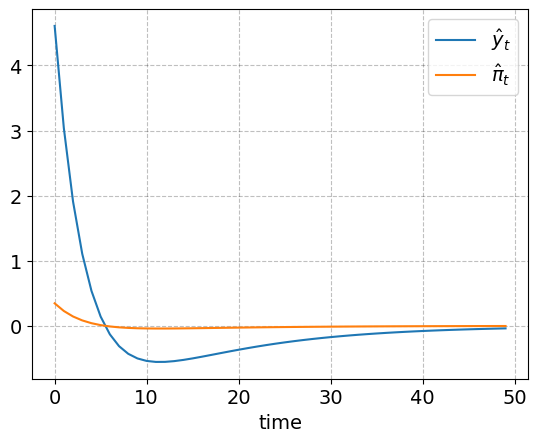

In [10]:
model.impulse_response(demand=True)
simT_fig = 50 # first 100 periods
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(simT_fig),sim.y_hat[:simT_fig],label='$\\hat{y}_t$')
ax.plot(np.arange(simT_fig),sim.pi_hat[:simT_fig],label='$\\hat{\pi}_t$')
ax.set_xlabel('time')
ax.legend(frameon=True);

**ASAD diagram**

In [11]:
y_bar = 2
pi_bar = 2

beta_1 = 0.700 # slope of AD
gamma = 0.075 # slope of SRAS
beta_2 = 0.1 # Effect of interest rate on AD
theta = 0.1 # Adjustment expectations for real exchange rate
h = 0.5 # Centralbanks Reponse to inflationsgap
beta1_hat = beta_1 + h*(beta_1/theta+beta_2)

def plot_ASAD(t=0, demand=True):
    y = np.linspace(-10, 10, 1000)

    # Period 0
    er_0 = 0
    z_0 = 0
    s_0 = 0
    pi_AD_0 = pi_bar + beta_1/beta1_hat * er_0 - 1/beta_1*(y-y_bar) + z_0/beta_1 # AD
    pi_AS_0 = pi_bar + gamma*(y-y_bar) + s_0 # AS
    intersection_index_0 = np.argmin(np.abs(pi_AD_0 - pi_AS_0))
    
    # Period 1
    if demand == True:
        z_1 = 5
        s_1 = 0
    else:
        z_1 = 0
        s_1 = 5
    er_1 =  er_0 - pi_AS_0[intersection_index_0] + pi_bar # ER
    pi_AD_1 = pi_bar + beta_1/beta1_hat * er_0 - 1/beta_1*(y-y_bar) + z_1/beta_1 # AD
    pi_AS_1 = pi_bar + gamma*(y-y_bar) + s_1 # AS
    intersection_index_1 = np.argmin(np.abs(pi_AD_1 - pi_AS_1))

    # Period 2
    z_2 = 0
    s_2 = 0

    er_2 =  er_1 - pi_AS_1[intersection_index_1] + pi_bar # ER
    pi_AD_2 = pi_bar + beta_1/beta1_hat * er_1 - 1/beta_1*(y-y_bar) + z_2/beta_1 # AD
    pi_AS_2 = pi_bar + gamma*(y-y_bar) + s_2 # AS
    intersection_index_2 = np.argmin(np.abs(pi_AD_2 - pi_AS_2))    

    if t == 0:
        plt.plot(y, pi_AD_0, label = "AD", color = "blue")
        plt.plot(y, pi_AS_0, label = "AS", color = "darkorange")
        plt.axvline(x=y_bar, color='red', linestyle='--', label='LRAS')
        plt.xlabel('Price Level')
        plt.ylabel('Real GDP')
        plt.legend()
        plt.title('AS-AD Diagram')

    if t == 1:
        plt.plot(y, pi_AD_0, linestyle = "--", label = "$AD_{t-1}$", color = "blue")
        plt.plot(y, pi_AD_1, label = "AD", color = "blue")
        plt.plot(y, pi_AS_1, label = "AS", color = "darkorange")
        plt.axvline(x=y_bar, color='red', linestyle='--', label='LRAS')
        plt.xlabel('Price Level')
        plt.ylabel('Real GDP')
        plt.legend()
        plt.title('AS-AD Diagram')

t_slider = widgets.IntSlider(value=0, min=0, max=1, step=1, description='Time Period')

interact(plot_ASAD, t = t_slider)

interactive(children=(IntSlider(value=0, description='Time Period', max=1), Checkbox(value=True, description='…

<function __main__.plot_ASAD(t=0, demand=True)>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

from modelproject import plot_ASAD

t_slider = widgets.IntSlider(value=0, min=0, max=10, step=1, description='Time Period')
shock_type = widgets.ToggleButtons(options=['Demand', 'Supply'], description='Shock Type')

def update_plot(t, shock_type):
    plot_ASAD(t=t, demand=(shock_type == 'Demand'))

interact(update_plot, t=t_slider, shock_type=shock_type)


interactive(children=(IntSlider(value=0, description='Time Period', max=10), ToggleButtons(description='Shock …

<function __main__.update_plot(t, shock_type)>

## 5. <a id='toc5_'></a>[Conclusion](#toc0_)

Unfinished